## Project: Investigate a Dataset
### Dataset: Medical Appointment No-Shows(csv)

###  Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset being analysed contains a list of patients in Brazil with scheduled medical appointments. The aim of this project to analyse the trend of patients who show up to appointments and those who do not, based on certain data about the patients. This data ranges from the age and demographic of the patient to health status of the patients. Which patients are more likely to show up to a scheduled appointment and why.

#### **Questions to be answered by this analysis:**
* How many patients showed up for their appointment?
* What gender is more likely to visit the doctor's for an appointment?
* Did Having a scholarship encourage patients to show up to their appointment?
* Did the health status of the patient prevent them from showing up to their appointment?
* Are patients who received SMS more likely to show up for their appointment?



#### **Description Of Columns**:
**PatientID**: Patient's Identification Number<br/>
**AppointmentID**: The Patient's Appointment Number<br>
**Gender**: M for Male and F for Female<br>
**ScheduleDay**: The day the patient's appointment was set up<br>
**AppointmentDay**: The actual day of the appointment<br>
**Age**: The patient's age<br>
**Neighbourhood**: Location of the hospital.<br>
**Scholarship**: Is the patient on the Bolsa Familia Scholarship(Yes or No)<br>
**Hypertension**: Whether a patient is hypertensive or not<br> 
**Diabetes**: Is a patient diabetic or not(1 - Yes, 0 - No)<br>
**Alcoholism**: Is the patient an alcoholic(1 - Yes, 0 -No)<br>
**Handcap**: Is the patient handicapped<br>
**SMS_received**: Was a patient sent an SMS reminder for their appointment<br>
**No-show**: Yes meaning the patient did not show up, No meaning the patient showed up.<br>

In [1]:
# Use this cell to set up import statements for all the packages that you
#   plan to use.

# import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set(style="darkgrid", color_codes=True)

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check the shape of the dataframe.
df.shape

(110527, 14)

In [4]:
# General info about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no null values in the dataset.<br>
Although there will be need to adjust the names and datatypes of some columns.

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
# Check out the unique values for each column in the dataset.
pd.DataFrame(df.nunique(), columns=['unique_values'])

,unique_values
PatientId,62299
AppointmentID,110527
Gender,2
ScheduledDay,103549
AppointmentDay,27
Age,104
Neighbourhood,81
Scholarship,2
Hipertension,2
Diabetes,2


In [8]:
# Examine the handcap column 
df.Handcap.unique()
# The Handcap column should also be a binary type field
# 0 meaning, patient is not handicapped
# 1 - 4, represents 1, meaning patient is handicapped

array([0, 1, 2, 3, 4], dtype=int64)

In [9]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
# Examining columns with binary values.
cols_bi = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show']
for col in cols_bi:
    print(df[col].value_counts())
    print('\n')

F    71840
M    38687
Name: Gender, dtype: int64


0    99666
1    10861
Name: Scholarship, dtype: int64


0    88726
1    21801
Name: Hipertension, dtype: int64


0    102584
1      7943
Name: Diabetes, dtype: int64


0    107167
1      3360
Name: Alcoholism, dtype: int64


0    75045
1    35482
Name: SMS_received, dtype: int64


No     88208
Yes    22319
Name: No-show, dtype: int64




In [11]:
# Summary statistics of the dataframe.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

1. Rename all columns using the lower case format and underscores to separate words.
2. Change the datatype of the columns to the appropriate datatype.
3. Remove the rows with age less than 0.

In [12]:
for col in df.columns:
    col_rename = col.lower().strip()
    df.rename(columns={col:col_rename}, inplace=True)

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df.rename(columns={
    'scheduledday': 'scheduled_day',
    'appointmentday': 'appointment_day',
}, inplace=True)

In [14]:
# correct the spelling for hypertension
# rename no-show to no_show
df.rename(columns={'hipertension':'hypertension',
                    'no-show': 'no_show',
                    'handcap': 'handicap'}, inplace=True)

In [15]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [16]:
df.handicap = df.handicap.apply(lambda x: 1 if x > 0 else 0)
df.handicap.value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

In [17]:
# Drop the irrelevant columns
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
df1 = df.copy()
df1 = df1.query('age >= 0')
df1.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
# Convert the scheduled_day and appointment_day columns to datetime
df1['scheduled_day'] = pd.to_datetime(df1['scheduled_day'])
df1['appointment_day'] = pd.to_datetime(df1['appointment_day'])
df1.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110526 non-null  object             
 1   scheduled_day    110526 non-null  datetime64[ns, UTC]
 2   appointment_day  110526 non-null  datetime64[ns, UTC]
 3   age              110526 non-null  int64              
 4   neighbourhood    110526 non-null  object             
 5   scholarship      110526 non-null  int64              
 6   hypertension     110526 non-null  int64              
 7   diabetes         110526 non-null  int64              
 8   alcoholism       110526 non-null  int64              
 9   handicap         110526 non-null  int64              
 10  sms_received     110526 non-null  int64              
 11  no_show          110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usag

In [21]:
# Convert no-show and handicap to binary type
df1.replace({'no_show': {'No': 0, 'Yes': 1}}, inplace=True)
df1.astype({'no_show': 'int64'})
df1.dtypes

gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                          int64
dtype: object

In [22]:
df1.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



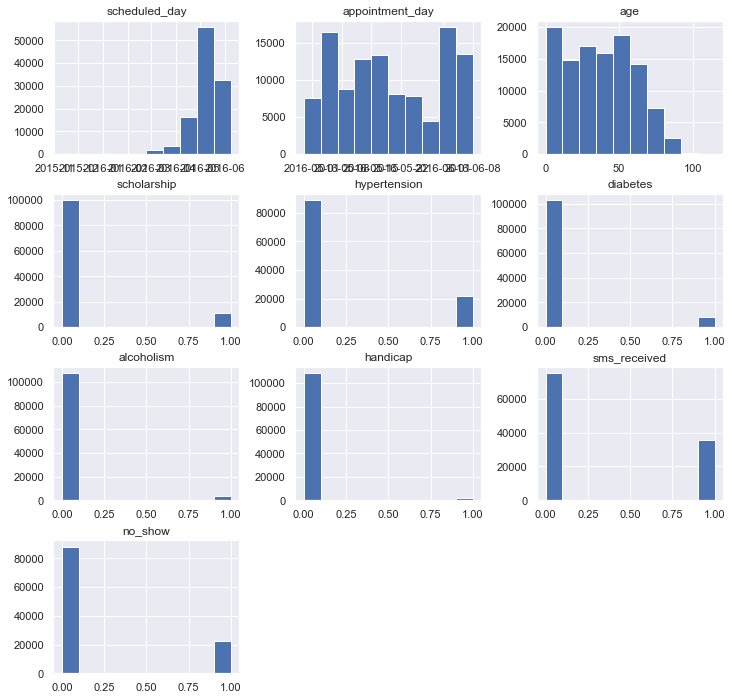

In [23]:
df1.hist(figsize=(12, 12))
plt.show()

In [24]:
# df1.corr()
# sns.heatmap(df1.corr(), annot=True, linewidths=0.2, cbar_kws={'label': 'Correlation'}, fmt='0.2f')

### How many patients showed up for their appointment?

In [25]:
(df1['no_show'].value_counts(normalize=True) * 100).round(1).to_frame()
# Almost 80% of the patients showed up for the appointment

,no_show
0,79.8
1,20.2


`80%` of patients showed up for their appointment.<br>
`20%` missed their appointment

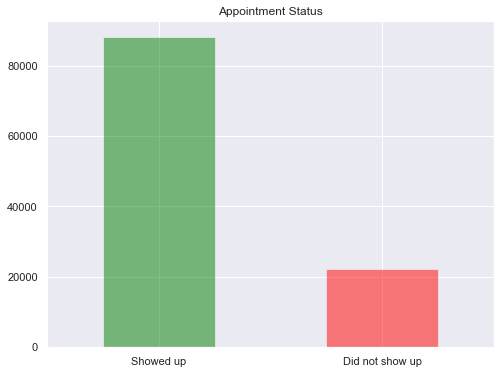

In [26]:
df1['no_show'].value_counts().plot(
    kind='bar',
    title='Appointment Status',
    color=['green', 'red'],
    alpha=0.5,
    figsize=(8, 6),
)

plt.xticks([0, 1], ['Showed up', 'Did not show up'], rotation=0)
plt.show()

From the graph above, it is seen that a larger percentage of patients showed up to their appointment.

### What gender is more likely to visit the doctor's for an appointment?

In [27]:
df1.groupby('gender')['no_show'].value_counts(normalize=True).to_frame().rename(columns={'no_show': 'count'})

count
gender no_show          
F      0        0.796851
       1        0.203149
M      0        0.800321
       1        0.199679

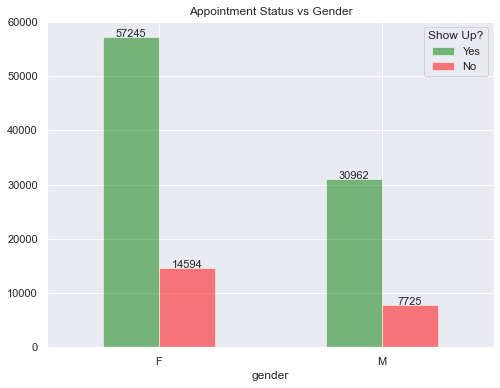

In [28]:
df1.groupby('gender')['no_show'].value_counts().unstack().plot(
    kind='bar',
    title='Appointment Status vs Gender',
    color=['green', 'red'],
    alpha=0.5,
    figsize=(8, 6),
    rot=0
)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height + 0.005, '{}'.format(height), ha='center', fontsize=11)

plt.legend(title='Show Up?', labels=['Yes', 'No'])
plt.show()

There a more females than males. Females generally tend to visit the doctor's.

Analyzing Gender individually

In [29]:
# For males
def gender_plot(gender):
    gender = gender.lower()
    if gender == 'male':
        gender = 'M'
    else:
        gender = 'F'

    df1[df1.gender == gender].no_show.value_counts().plot(
        kind='pie',
        title=f'Patients Appointments({gender})', 
        autopct='%1.1f%%', 
        figsize=(5,5),
        labels=('Showed Up', 'No Show'),
    )
    plt.show()

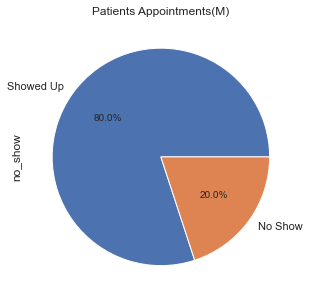

In [30]:
# For male patients
gender_plot('Male')

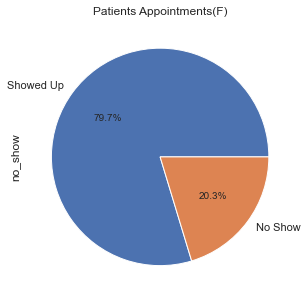

In [31]:
gender_plot('Female')

From the plots above, `gender` has little to no effect on the `no-show`.<br>
Regardless of gender, `80%` of patients still showed up for the appointment.

### Does age affect the number of patients who showed up to their appointment?

In [32]:
# Was age a factor in showing up for the appointment?
# Examine the age demographics of the patients that showed up and those who did not 

# Create a new column to categorize the age groups using the pandas.cut() function
df1['age_group'] = pd.cut(df1['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

In [33]:
df1.age_group.value_counts()

0-18     25327
19-35    24137
51-65    22122
36-50    22100
66+      13294
Name: age_group, dtype: int64

In [34]:
(df1.groupby('age_group')['no_show'].value_counts(normalize=True) * 100).to_frame().rename(columns={'no_show': 'count'})

count
age_group no_show           
0-18      0        77.462787
          1        22.537213
19-35     0        76.165224
          1        23.834776
36-50     0        79.674208
          1        20.325792
51-65     0        83.450863
          1        16.549137
66+       0        84.481721
          1        15.518279

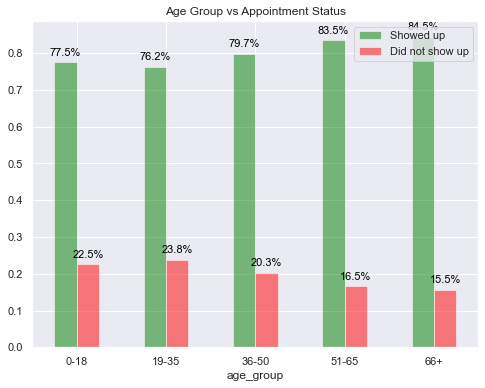

In [35]:
df1.groupby('age_group')['no_show'].value_counts(normalize=True).unstack().plot(
    kind='bar',
    title='Age Group vs Appointment Status',
    color=['green', 'red'],
    alpha=0.5,
    figsize=(8, 6),
    rot=0
)

for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}%'.format(p.get_height()*100), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                       textcoords='offset points')

plt.legend(['Showed up', 'Did not show up'], loc='upper right')
plt.show()

It is seen across all age groups, that a larger percentage of patients showed up to their appointment.<br>
Across all age groups, 76% to 84% of patients showed up to their appointment.<br>
Leaving an average of 80% of patients showing up to their appointment.

Although a 84.5% of the elderly patients(66+ years old) showed up to their appointment. Which is the largest when compared to other age groups.



### Did Having a scholarship encorage patients to show up to their appointment?


In [36]:
(df1.groupby('no_show')['scholarship'].value_counts(normalize=True) * 100).to_frame().rename(columns={'scholarship': 'percent_scholarship'}).round(1)

percent_scholarship
no_show scholarship                     
0       0                           90.6
        1                            9.4
1       0                           88.4
        1                           11.6

In [37]:
(df1.groupby('scholarship')['no_show'].value_counts(normalize=True) * 100).to_frame().round(1)

no_show
scholarship no_show         
0           0           80.2
            1           19.8
1           0           76.3
            1           23.7

With or without a scholarship, approximately 80% of patients still show up for their appointments.

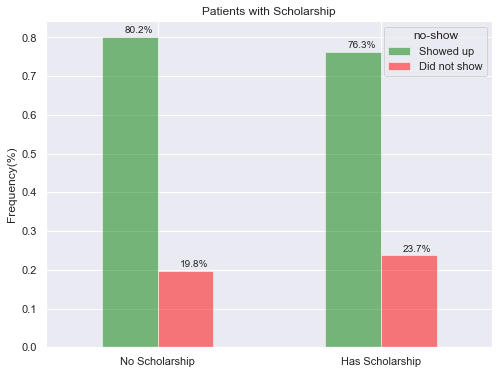

In [38]:
df1.groupby('scholarship')['no_show'].value_counts(normalize=True).unstack().plot(
    kind='bar',
    title='Patients with Scholarship',
    color=['green', 'red'],
    alpha=0.5,
    figsize=(8, 6),
    rot=0
)

for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}%'.format(p.get_height()*100), (p.get_x()+0.1, p.get_height()+0.01))

plt.legend(title='no-show', labels=['Showed up', 'Did not show'], loc='upper right')
plt.xticks([0, 1], ['No Scholarship', 'Has Scholarship'], rotation=0)
plt.ylabel('Frequency(%)')
plt.xlabel(None)
plt.show()

In [39]:
# For the patients with a Bolsa scholarship,
df1[df1.scholarship == 1].no_show.value_counts(normalize=True)

0    0.762637
1    0.237363
Name: no_show, dtype: float64

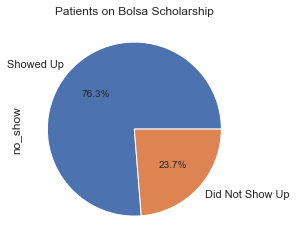

In [40]:
df1[df1.scholarship == 1].no_show.value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=('Showed Up', 'Did Not Show Up'),
    title='Patients on Bolsa Scholarship',
)
plt.show()

About 24% of scholarship beneficiaries did not show up for their appointment.<br>
76.3% of them showed although this is a lesser percentage when compared with those without a scholarship.


### Did the health status of the patient prevent them from showing up to their appointment?

In [41]:
df1_melt = df1.melt(id_vars=['no_show'], value_vars=['hypertension', 'diabetes', 'alcoholism', 'handicap'])
df1_melt

,no_show,variable,value
0,0,hypertension,1
1,0,hypertension,0
2,0,hypertension,0
3,0,hypertension,0
4,0,hypertension,1
...,...,...,...
442099,0,handicap,0
442100,0,handicap,0
442101,0,handicap,0
442102,0,handicap,0


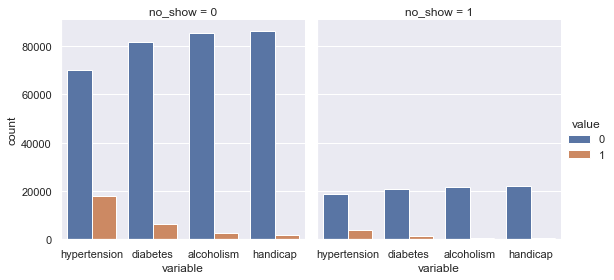

In [42]:
sns.catplot(
    x='variable',
    hue='value',
    col='no_show',
    col_wrap=2,
    data=df1_melt,
    kind='count',
    height=4,
    aspect=1,
)

plt.show()

### Observations:
no_show == 0: Patients who showed up for their appointment<br>
no_show == 1: Patients who did not show up for their appointment

**value**:<br>
0: no disease <br>
1: disease positive

#### For patients who showed up for the appointment:
1. A larger number of them were not hypertensive.
1. Patients with diabetes were more than patients without diabetes.
2. Alcoholics and Handicapped patients were less than patients without these conditions.

#### For patients who did not show up for the appointment:
1. Most of these patients were not hypertensive, diabetic, alcoholics, or handicapped.
2. Meaning that these patients were mostly likely healthy and able-bodied.



### Analyzing health status individually

In [43]:
def plot_count(x, hue, title, figsize=(8, 6)):
    """
    Plot a count plot of the given x and hue
    """
    df1.groupby(x)[hue].value_counts(normalize=True).unstack().plot(
        kind='bar',
        title=title,
        color=['green', 'red'],
        alpha=0.5,
        figsize=figsize,
        rot=0,
    )
     
    for p in plt.gca().patches:
        plt.gca().annotate(
            f'{p.get_height():.1%}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points',
        )

    plt.legend(['Showed up', 'Did not show up'], loc='upper right')
    plt.show()

Were Hypertensive patients more likely to show up for their appointment?

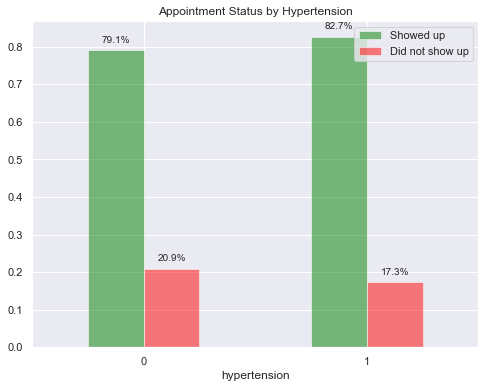

In [44]:
plot_count('hypertension', 'no_show', 'Appointment Status by Hypertension')

Were Diabetic patients more likely to show up for their appointment?

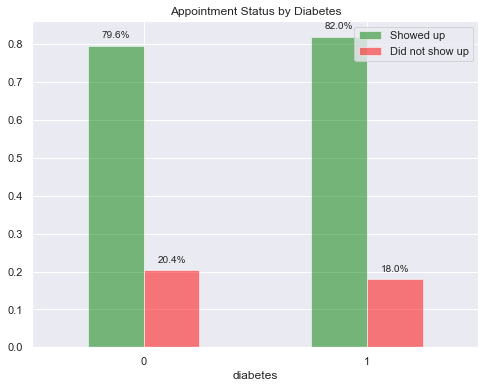

In [45]:
plot_count('diabetes', 'no_show', 'Appointment Status by Diabetes')

Were Alcoholics more likely to show up for their appointment?

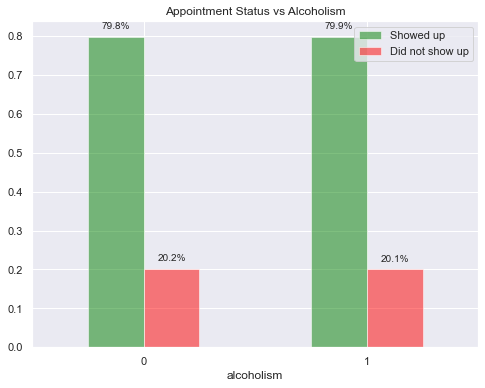

In [46]:
plot_count('alcoholism', 'no_show', 'Appointment Status vs Alcoholism')

Were Handicapped patients more likely to show up for their appointment?

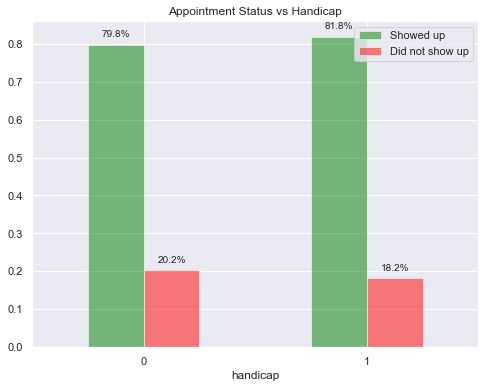

In [47]:
plot_count('handicap', 'no_show', 'Appointment Status vs Handicap')

Regardless of the health status, approximately 80% of patients showed up for their appointment.

### Are patients who received SMS more likely to show up for their appointment?

In [48]:
# Patients who received an SMS reminder
(df1.groupby('sms_received')['no_show'].value_counts(normalize=True).to_frame() * 100).round(1)

no_show
sms_received no_show         
0            0           83.3
             1           16.7
1            0           72.4
             1           27.6

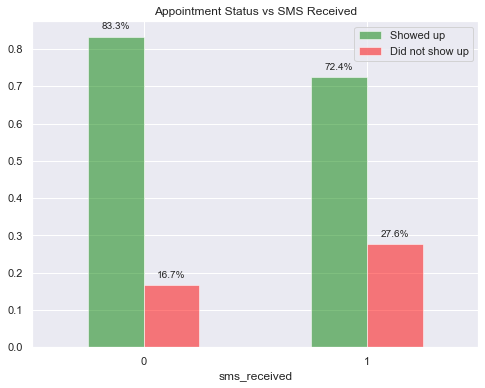

In [49]:
# SMS received
plot_count('sms_received', 'no_show', 'Appointment Status vs SMS Received')

Patients who did not receive an SMS showed up more often for their appointment than those who did receive an SMS.
The SMS had a negative effect on the percentage of patients who showed up for their appointment.

<a id='conclusions'></a>
## Conclusions



Conclusions drawn from this analysis:

1. 80% of patients do show up for their appointments
2. A larger percentage of these patients are females, Although when both genders are analyzed separately, it is discovered that approximately 80% of each gender show up for their appointment
3. The percentage of patients who show up for their appointment is highest amongst the elderly(aged 66+)
4. Those who fall within the age group(16-35) have the highest chance of missing their appointment.
5. The percentage of patients who show up for their appointment is higher amongst the patients who do not have a scholarship when compared to those who do have a scholarship.
6. It was discovered that most of the patients who missed their appointment were not hypertensive, diabetic, alcoholics, or handicapped.
7. Sending SMS to patients has a negative effect on the percentage of patients who showed up for their appointment.



Limitations:
1. The Handicap column has values ranging from 0 to 4. It is not clear what these values mean. I carried on with the assumption that 0 means the patient is not handicapped and 1-4 means the patient is handicapped.
2. The dataset is not balanced. There are more patients who showed up for their appointment than those who did not. This could have affected the results of the analysis.
3. The analysis was carried out on a sample of the population. The results of the analysis may not be representative of the entire population.


In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])


1

References:
1. [Pie charts with Matplotlib](https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm)
2. [Annotating barplots](https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/)
3. [Using pandas.melt](https://stackoverflow.com/questions/60625159/using-pandas-dataframe-melt-to-plot-data-with-seaborn)